In [15]:
%load_ext autoreload
%autoreload 2

from binarycmd.binarycmd import CMD
from binarycmd.photsys import PhotSystem
from binarycmd import quick_cmd

import pkg_resources

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example use case

The CMD class combines a pandas DF with one or more matplotlib axes to perform various operations.

There are a few pre-requisites for formatting the DF before it can be added to the CMD object. Notably, the extinctions should be calculated using binarycmd.get_extinctions.add_mwdust()

The following columns are required:
* parallax_over_error
* magnitude (Gmag, Kmag, etc.)
* color
* distance in pc



In [16]:
df = pd.read_csv(pkg_resources.resource_filename(__name__, 'data/'+'example_dataset.csv'))
df

,Source,RA_ICRS,DE_ICRS,Plx,e_Plx,RPlx,Gmag,BPmag,RPmag,BP-RP,...,mwdust_ah,mwdust_aj,mwdust_ak,mwdust_ag,mwdust_abp,mwdust_arp,Jmag,Hmag,Kmag,J_K
0,4264884387330190464,289.838854,2.043051,0.559027,0.014814,37.737670,13.229576,14.113565,12.299981,1.813583,...,0.235250,0.369752,0.158538,1.082200,1.374353,0.807878,10.959,10.314,10.152,0.806999
1,4471126479159876096,272.436624,4.603183,6.855651,0.215142,31.865744,7.736005,7.827422,7.544694,0.282728,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.302,7.188,7.180,0.122000
2,4471126998856761856,272.516712,4.598174,3.005417,0.101227,29.689774,11.617226,12.016683,11.045868,0.970815,...,0.059800,0.093990,0.040300,0.275093,0.349357,0.205361,10.389,10.050,9.951,0.438000
3,4471288828920871552,270.791868,4.781310,0.525365,0.012798,41.051330,11.786005,12.556730,10.931841,1.624889,...,0.092000,0.144600,0.062000,0.423220,0.537473,0.315940,9.725,9.045,8.811,0.914000
4,4470864627903320832,274.495101,5.418234,NaN,NaN,NaN,13.293974,13.306154,12.343015,0.963140,...,NaN,NaN,NaN,NaN,NaN,NaN,11.663,11.357,11.243,0.420000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58085,5243355933922263296,145.719654,-70.382609,4.119975,0.011417,360.849370,9.087285,9.343744,8.662322,0.681422,...,0.023480,0.036904,0.015823,0.108012,0.137171,0.080633,8.175,8.010,7.908,0.267000
58086,4612646304395420416,57.066743,-86.790329,2.781248,0.012215,227.693120,11.540461,11.805093,11.114757,0.690336,...,0.045169,0.070994,0.030440,0.207788,0.263883,0.155117,10.674,10.451,10.364,0.309999
58087,4612700833300117888,65.489013,-86.497782,1.626060,0.013005,125.038110,10.628534,10.791705,10.340539,0.451166,...,0.053402,0.083935,0.035989,0.245662,0.311981,0.183390,10.012,9.917,9.852,0.160000
58088,4612740518797911680,65.380588,-86.092239,1.961538,0.040836,48.034622,12.069484,12.388156,11.581136,0.807020,...,0.051314,0.080652,0.034581,0.236055,0.299781,0.176219,11.054,10.765,10.701,0.353000


Reading in: /Users/rowan.90/BHs/binarycmd_data/MIST_iso_61ddebc974204.iso.cmd
Reading in: /Users/rowan.90/BHs/binarycmd_data/MIST_iso_61ddebc974204.iso.cmd


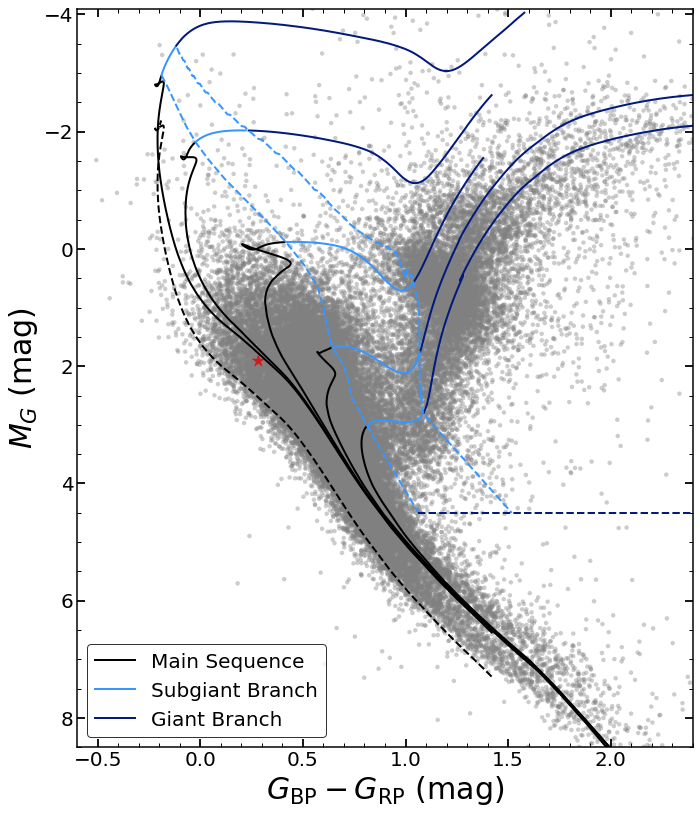

In [10]:
#Create a CMD object
cmd_gaia = CMD(df, phot_system=PhotSystem.gaia_dr3()) 

#Calculate extinction-corrected color and absolute magnitude
cmd_gaia.calculate_color_mags() 

#Remove systems with high extinction or low parallax_over_error
cmd_gaia.apply_quality_cuts(ext_cut=2.0, rplx_cut=5)

#Make a simple scatter plot
cmd_gaia.plot()

#Plot mist isochrones (EEP method)
cmd_gaia.plot_mist_eep()

#Plot a single-star isochrone
cmd_gaia.plot_single_star_isochrone()

#Mark a single target or list of targets
cmd_gaia.mark_id(4471126479159876096, column='Source', plot_kwargs=dict(marker='*', s=200))

# The PhotSystem objects

In order to making handling different photometric systems (e.g. Gaia vs. 2MASS) easier, each CMD is initialized with a PhotSystem object that keeps track of column names for the input DF and the MIST isochrones and evolutionary tracks.

There are three defaults: 
 * photsystem.PhotSys.gaia_dr3() : uses the column names for Gaia DR3 on Vizier
 * photsystem.PhotSys.gaia_default() : uses the Gaia DR2 column names and AIP column names
 * photsystem.PhotSys.twomass_default() : uses the 2MASS colors and magnitudes

In [17]:
print(PhotSystem.twomass_default())
print('~~~~~~')
print(df.columns)

apparent mag column: kmag
color column: j_k
MIST mag column: 2MASS_Ks
MIST blue color column: 2MASS_J
MIST red color column: 2MASS_Ks
Extinction column: mwdust_ak
Extinction column blue color: mwdust_aj
Extinction column red color: mwdust_aj
~~~~~~
Index(['Source', 'RA_ICRS', 'DE_ICRS', 'Plx', 'e_Plx', 'RPlx', 'Gmag', 'BPmag',
       'RPmag', 'BP-RP', 'rpgeo', 'mwdust_av', 'mwdust_ah', 'mwdust_aj',
       'mwdust_ak', 'mwdust_ag', 'mwdust_abp', 'mwdust_arp', 'Jmag', 'Hmag',
       'Kmag', 'J_K'],
      dtype='object')


If we initialize the CMD object with the default 2MASS phot system, we will be missing the "j_k" column and the "kmag" column. We could change the dataframe, or adjust the PhotSystem.

It is usually easier to just adjust the DF so the columns are named correctly, but for demonstration purposes:

In [21]:
custom_twomass_photsystem = PhotSystem.twomass_default(
    mag='Kmag', color='J_K')

print(custom_twomass_photsystem)

apparent mag column: Kmag
color column: J_K
MIST mag column: 2MASS_Ks
MIST blue color column: 2MASS_J
MIST red color column: 2MASS_Ks
Extinction column: mwdust_ak
Extinction column blue color: mwdust_aj
Extinction column red color: mwdust_aj


Reading in: /Users/rowan.90/BHs/binarycmd_data/MIST_iso_61ddebc974204.iso.cmd
Reading in: /Users/rowan.90/BHs/binarycmd_data/MIST_iso_61ddebc974204.iso.cmd


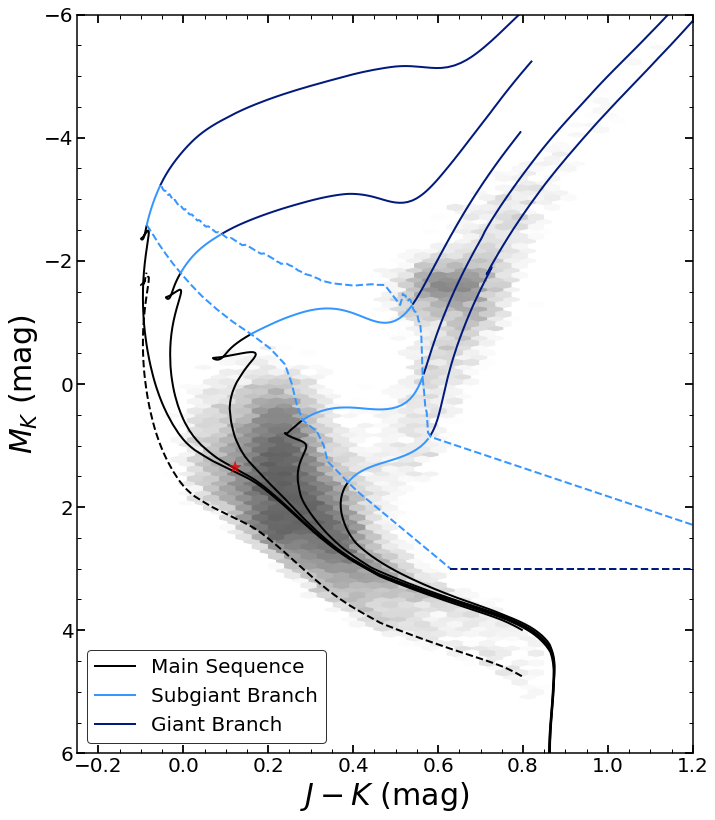

In [35]:
cmd_2mass = CMD(df, phot_system=custom_twomass_photsystem)
cmd_2mass.calculate_color_mags() 
cmd_2mass.apply_quality_cuts(ext_cut=2.0, rplx_cut=5)
cmd_2mass.plot_hexbin(plot_kwargs=dict(vmin=10, vmax=800, gridsize=(120, 100))) # Different plotting option to show a 2d histogram
cmd_2mass.plot_mist_eep()
cmd_2mass.plot_single_star_isochrone()
cmd_2mass.mark_id(4471126479159876096, column='Source', plot_kwargs=dict(marker='*', s=200, zorder=5))